In [1]:
import numpy as np
import matplotlib.pyplot as plt
from AM_pulses import AM_rf
from slr_pulses import slr_pulse

# Code to calculate the pulse integral of a shaped pulse as a % of a square pulse. This value can be used to calculate the RF power/amplitude required for a shaped pulse (in kHz)

In [12]:
# common elements
pulse_length = 10000  #us
shape_pts = 256 # nr. of pts to use in the pulse shape

## Option 1: Basic shapes (non-SLR). Use Option 2 for SLR pulses

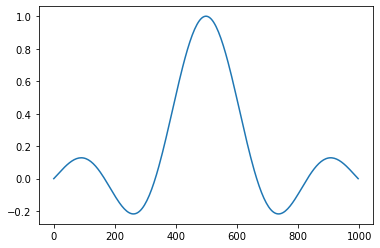

In [6]:
# generate the shape. Only need the AM waveform for this calculation
pulse_func = 'sinc'# sinc, square, gaussian, hermite
SINC_LOBES = 3
GAUSSIAN_TRUNCATION = 1 # in %
HERMITE_NUT_ANGLE = 180

rf, fm, pm, time = AM_rf(func=pulse_func, shape_pts=shape_pts,
                         pulse_length=pulse_length, lobes=SINC_LOBES,
                         trunc_lvl=GAUSSIAN_TRUNCATION, nut_angle=HERMITE_NUT_ANGLE
                        )
plt.plot(time,rf) # plot only for illustration

## Option 2: SLR optimized pulses. Skip if using Option 1

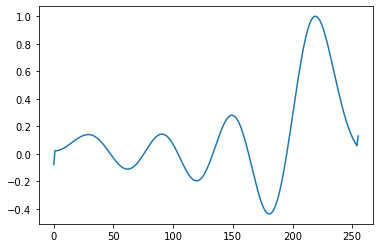

In [13]:
# SLR pulse parameters
N = shape_pts  # Number of time points
TBW = 9.62  # time-bandwidth product
PULSE_LEN = pulse_length  #ms
PULSE_BW = TBW/PULSE_LEN #kHz
PBR = 0.01  # pass-band ripple
SBR = 0.01  # stop-band ripple
PULSE_TYPE = "ex" # inv, se, ex, sat, st (small-tip)
FILTER_TYPE = "min" # 'pm', 'ls', 'ms', 'min', 'max'

# Root-flipped pulse parameters
ROOT_FLIP = False
if PULSE_TYPE == "ex" or PULSE_TYPE == "sat":
    ROOT_FLIP_ANGLE = 90
elif PULSE_TYPE == "inv" or PULSE_TYPE == "se":
    ROOT_FLIP_ANGLE = 180
else:
    ROOT_FLIP_ANGLE = 180

# Multiband pulse parameters
MULTI_BAND = False
N_BANDS = 2
PHS_TYPE = 'quad_mod' # for n_bands >= 3 only: phs_mod, amp_mod, 
                        # for all n_bands: quad_mod, or 'None'
BAND_SEP = 6*TBW # separated by BAND_SEP slice widths

rf, _, _, _ = slr_pulse(
    num=N, time_bw=TBW, 
    ptype=PULSE_TYPE, ftype=FILTER_TYPE, 
    d_1=PBR, d_2=SBR, 
    root_flip=ROOT_FLIP, 
    multi_band = MULTI_BAND,
    n_bands = N_BANDS,
    phs_type = PHS_TYPE,
    band_sep = BAND_SEP
)
rf = rf.real/np.amax(rf.real) # normalizing the output and using the real part only
plt.plot(rf)

In [14]:
# reference square pulse 
sq_pulse = np.linspace(1,1,shape_pts)

# Calulate pulse integtral
pulse_integral = np.round((np.trapz(rf)/np.trapz(sq_pulse)),4)
print('Pulse integral for this pulse is: ', pulse_integral )

Pulse integral for this pulse is:  0.1209


# Now use the pulse integral value to calculate the required RF power in kHz

In [15]:
# Set the desired flip angle in degrees
#pulse length declared previously will be used, converted to ms
flip_angle = 180 #degrees

rf_power = np.round((flip_angle/(360*pulse_integral*pulse_length*1e-3)),4)
print('Required RF power (in kHz) for this pulse is: ', rf_power)

Required RF power (in kHz) for this pulse is:  0.4136


In [16]:
# Convert kHz to microtesla (uT)
gamma = 42.57 #kHz/mT, gyrommagnetic ratio
rf_power_uT = np.round(((1e3*rf_power)/gamma),2)

print('Required RF power (in uT) for this pulse is: ', rf_power_uT)

Required RF power (in uT) for this pulse is:  9.72
